# Virtual Parameters

This demo notebook shows how to use Artemis with virtual parameters. Virtual parameters are parameters that are not measured and provided by the database but rather the result of a computation on measured parameters. In this demo we will compute the shock index which is the heart rate divided by the systolic blood pressure.

### Load eICU CRD (Demo) and define virtual paramaters

In [1]:
import numpy as np
import sys; sys.path.append('../src')
from artemis.artemis import Artemis
from artemis.events import *
from artemis.thresholds import *
from artemis.virtuals import *

path = '../../physionet.org/files/eicu-crd-demo/2.0.1'
virtuals = {'Shock Index': shockindex}
filter = lambda patient: patient.wardid == 259

artemis = Artemis(path, virtuals, filter, snooze_duration='3min').load()

Loading database...


Creating Patient objects: 100%|██████████| 13/13 [00:00<00:00, 33.50it/s]


## Apply Alarm Strategies

Finally, we can apply an alarm threshold initialisation strategy and a alarm event generation strategy and plot the results.

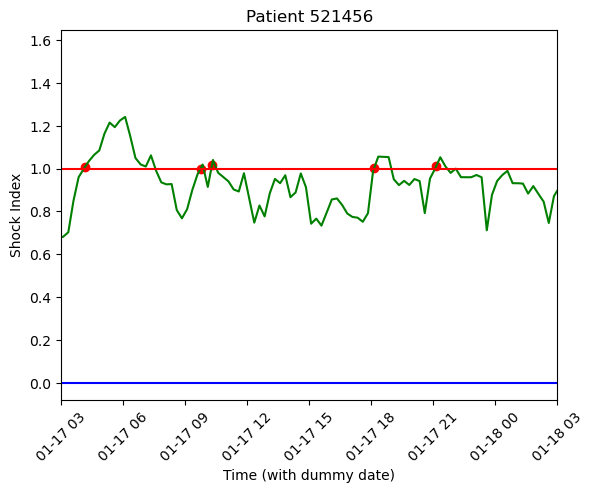

In [2]:
from datetime import datetime

ax = artemis.patients[0].parameters['Shock Index'].plot_alarms(fixed(1, 0), first)
ax.set_xlim(datetime(1970,1,17,3,0,0), datetime(1970,1,18,3,0,0))
ax.get_figure().savefig(
    '../generated/time_series_shockindex.pdf',
    bbox_inches='tight')